
# 초급 딥러닝 미션: "인공지능 마법사의 첫 번째 신경망"

## 🎯 학습 목표
- 딥러닝 및 파이토치 기본 개념 이해
- 텐서 생성 및 조작
- `nn.Module` 기반 모델 작성
- 시퀀셜 모델 구성
- 손실함수, 옵티마이저, 학습 루프 직접 구현
- 정확도 등 메트릭 계산 및 시각화



## 📂 사용 데이터셋
**MNIST 손글씨 숫자 이미지** (10개 숫자 분류, 흑백 이미지)  
👉 `torchvision.datasets.MNIST`에서 자동 다운로드 가능



## 🧩 미션 구성

### Part 1. 딥러닝과 파이토치 개요  
❓ 문제 1  
**딥러닝이 머신러닝과 다른 점은 무엇인가요?**  
✔️ 정답: 딥러닝은 다층 신경망을 활용해 많은 양의 데이터로부터 자동으로 특징을 학습하며, 이미지 분류나 음성 인식처럼 비선형성이
강한 문제에서 높은 성능을 발휘한다. 머신 러닝은 사람이 직접 특징을 추출하거나 선택한다. 적은 데이터로도 잘 작동하고, 딥러닝처럼 깊은 신경망을 사용하지 않는다. 또한 정형 데이터에 강하다. 

❓ 문제 2  
**파이토치의 핵심 구성 요소 3가지를 쓰세요.**  
✔️ 정답 : 
- 텐서(tensor): 데이터를 표현하는 기본 단위
- 연산그래프/자동미분(Autograd) : 역전파를 위한 미분 계산
- 모듈(nn.Module) : 신경망 모델을 구성하는 기본 단위 



### Part 2. 텐서 연산 실습  
🔧 실습 문제 3  
아래 조건에 맞는 텐서를 생성하세요:  
- 3x3 크기의 정규분포 난수 텐서
- 모든 원소에 대해 ReLU 함수를 적용한 텐서

힌트: `torch.randn`, `torch.relu`


In [1]:
import torch

x = torch.randn(3, 3)
x_relu = torch.relu(x)
print(x_relu)

tensor([[0.0635, 0.5647, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.7266]])



### Part 3. 신경망 직접 만들기  
🔧 실습 문제 4  
다음과 같은 신경망을 `nn.Module` 클래스를 상속받아 구현하세요:

- 입력: 28×28 이미지 → 784차원
- 은닉층: 128개 뉴런, 활성화 함수 ReLU
- 출력층: 10개 뉴런, 소프트맥스


In [20]:
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu()
        x = self.fc2(x)
        x = self.softmax(x)
        return x


### Part 4. 시퀀셜 모델 구성  
🔧 실습 문제 5  
동일한 구조를 `nn.Sequential`을 사용하여 작성하세요.

힌트: `nn.Sequential(...)`


In [27]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)
        



### Part 5. 손실함수와 옵티마이저  
🔧 실습 문제 6  
다음 코드에서 손실함수와 옵티마이저를 정의하세요:

```python
model = MyNet()
# 손실 함수 정의
# 옵티마이저 정의
```

요구사항:
- 손실 함수: `CrossEntropyLoss`(다중 클래스 분류)
- 옵티마이저: `SGD`, 학습률 0.01 : 데이터와 손실함수를 바탕으로 모델의 업데이트 방법 결정.


In [28]:
import torch.nn as nn
import torch.optim as optim 
#옵티마이저란? 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정하는것.

model = MyNet()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)


### Part 6. 데이터셋 및 데이터로더  
🔧 실습 문제 7  
`torchvision.datasets.MNIST`를 사용하여 학습 및 검증 데이터를 불러오고, `DataLoader`를 사용하여 배치 사이즈 64로 나누세요.


In [29]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#1. 전처리 (Transform)정의 
transform = transforms.Compose([
    transforms.ToTensor(), #[0, 255] -> [0,0, 1.0]/ 파이토치 텐서로 변환 및 픽셀 값 범위를 정규화 
    transforms.Normalize((0.5,), (1.0,)) #평균, 표준편차 정의 / (input-mean)/std
])
#compose? 이미지 전처리 과정을 순서대로 묶어주는 파이프라인. 
#2.학습 데이터셋 로드 
train_dataset = datasets.MNIST(
    root='/Users/jiyeonpark/mnist_data',
    train = True, 
    transform = transform, 
    download=True
)

#3. 검증(테스트)데이터 셋 로드 
test_dataset = datasets.MNIST(
    root = '/Users/jiyeonpark/mnist_data',
    train = False,
    transform = transform
)

#4.DataLoader로 나누기 (배치 사이즈 64)
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)


### Part 7. 학습 루프 구현하기  
🔧 실습 문제 8  
기본적인 학습 루프를 구현하세요. 다음을 포함해야 합니다:
- 배치 단위 데이터 가져오기
- 예측값 계산 (`model(x)`)
- 손실 계산 및 역전파
- 파라미터 업데이트


In [30]:
def train_model(model, train_loader, criterion, optimizer, epochs = 5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0
        for images, label in train_loader:
            optimizer.zero_grad()
            ouputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


        #파라미터(w,b)를 업데이트 하기 위해 3가지 단계  필요!
        #1.기울기 초기화 optimizer.zero_grad()
        #2.손실을 기준으로 역전파 loss.backward()
        #3.파라미터 업데이트 optimizer.step() 

  



### Part 8. 정확도(Accuracy) 계산  
🔧 실습 문제 9  
모델이 얼마나 잘 맞췄는지 정확도를 직접 계산하는 함수를 작성하세요.


In [31]:
def evaluate_accuracy(model, data_loader): #모델과 데이터로더를 받아서 , 해당 데이터셋에 대한 정확도를 계산!! 
    model.eval() #모델을 평가 모드로 전환 
    correct = 0  #맞춘 정답 개수 누적  
    total = 0 #전체 이미지 수 누적
    with torch.no_grad(): #기울기 계산 비활성화 -> 메모리 사용줄이고, 연산 속도 증가/ 평가시에는 기울기 계산 활성화하는게 좋음 
        for images, labels in data_loader: #배치단위로 반복 
            outputs = model(images) #예측값 계산 
            _, predicted = torch.max(outputs, 1) #각행에서 가장 큰값과, 그 인덱스를 반환/_뜻? 실제값은 필요없고, 예측한 클래스 번호(Index)만 필요하니까 버린거임
            total += labels.size(0) #현재 배치의 샘플 수 
            correct += (predicted == labels).sum().item() #.item() -> 파이토치 텐서를 숫자로 변환 
    return correct / total


### Part 9. 학습 과정 시각화  
🔧 실습 문제 10  
에폭별 손실값을 저장하고 `matplotlib`을 이용해 학습 곡선을 시각화하세요.


Epoch 1 Loss: 2.2831
Epoch 2 Loss: 2.1747
Epoch 3 Loss: 2.0141
Epoch 4 Loss: 1.8932
Epoch 5 Loss: 1.8401


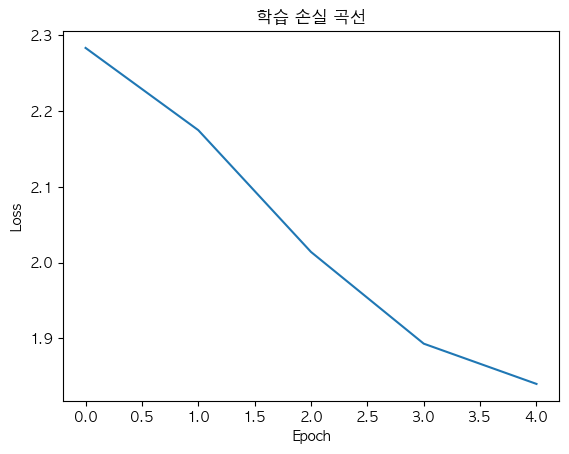

In [33]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우
# plt.rcParams['font.family'] = 'NanumGothic'  # 설치했을 때
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

model = MyNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
losses = []

model.train()
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1} Loss: {avg_loss:.4f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("학습 손실 곡선")
plt.show()



## 🎁 보너스 미션  
- `nn.Module`과 `nn.Sequential` 방식의 모델을 비교  
- 옵티마이저를 Adam으로 바꾸고 학습 결과 비교  
- 은닉층 크기를 256으로 변경하여 과적합 여부 확인


## 🎯 보너스 문제 1: `nn.Module` vs `nn.Sequential` 모델을 예시를 들어 비교하시오.

## 🎯 보너스 문제 2: Optimizer SGD vs Adam 비교

## 🎯 보너스 문제 3: 은닉층 크기 변경 (128 → 256)